In [28]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import PIL
from tensorflow import keras
import tensorflow as tf
from IPython.display import Image
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator   ###this will generate new images using the current images 

In [4]:
training_datagenerator = ImageDataGenerator(rescale=1./255,      # this is to normalize the pixels values
                                            horizontal_flip= True,       
                                            vertical_flip=True,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            validation_split=0.1,   ## 10% of the data will be given for the validation                                            
                                            )  ### this is a fuction that will generates new data from the existinf one

batch_size=16

In [5]:
filepath='D:/dataset_for_ml/fire and smoke/training'

# Loading the training data

In [6]:
train = training_datagenerator.flow_from_directory(filepath,
                                                   target_size = (256,256),
                                                   color_mode='rgb',
                                                   class_mode='binary',
                                                   batch_size=batch_size,
                                                   classes=['fire','smoke'],
                                                   subset='training')  ### this dataset will be for the training 



Found 12360 images belonging to 2 classes.


In [7]:
validation = training_datagenerator.flow_from_directory(filepath,
                                                   target_size = (256,256),
                                                   color_mode='rgb',
                                                   class_mode='binary',
                                                   batch_size=batch_size,
                                                    classes=['fire','smoke'],
                                                   subset='validation'
                                                   )   ### this dataset will be for the validation


Found 1373 images belonging to 2 classes.


In [8]:
train.class_indices

{'fire': 0, 'smoke': 1}

# Model

In [9]:
# intializing the CNN
cnn = tf.keras.models.Sequential() 


#first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3 ,padding='same',activation= 'relu', input_shape=[256,256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


#second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3 ,padding='same',activation= 'relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


#third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3 ,padding='same',activation= 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


#fourth layer
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3 ,padding='same',activation= 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))



#flattening
cnn.add(tf.keras.layers.Flatten())


#fully connected 
cnn.add(tf.keras.layers.Dense(units= 128, activation='relu'))  ## number of neurons in the fully connected layer is 128 


#output layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))  

###for the in btw layers we apply relu as activation but for the out layer we apply sigmoid for binary classification and softmax for the catrgorical classification

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       147712    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 256)      0

# Checkpoint to save model

In [11]:
##save our models in the directory 

checkpoint=tf.keras.callbacks.ModelCheckpoint('D:/dataset_for_ml/fire and smoke/model/fire_cnn_model.h5',
                                              monitor='val_loss',   ### validation loss
                                              mode='min',
                                              save_best_only=True)  ## save the best models which have least errors

callbacks=checkpoint

# Compiling the model

In [24]:
cnn.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])


# Fitting the training and validation data in model

In [25]:
history=cnn.fit(train,
                validation_data=validation,
                epochs=1,
                steps_per_epoch=train.samples//batch_size,
                validation_steps=validation.samples//batch_size,
                callbacks=callbacks)

772/772 [==============================] - 1581s 2s/step - loss: 0.0392 - accuracy: 0.9909 - val_loss: 0.0177 - val_accuracy: 0.9963


# Predicting 

In [14]:
cnn=keras.models.load_model(r"D:\dataset_for_ml\fire and smoke\model\fire_cnn_model.h5")

In [15]:
filename1= 'D:/dataset_for_ml/fire and smoke/test_small/smoke13.png'

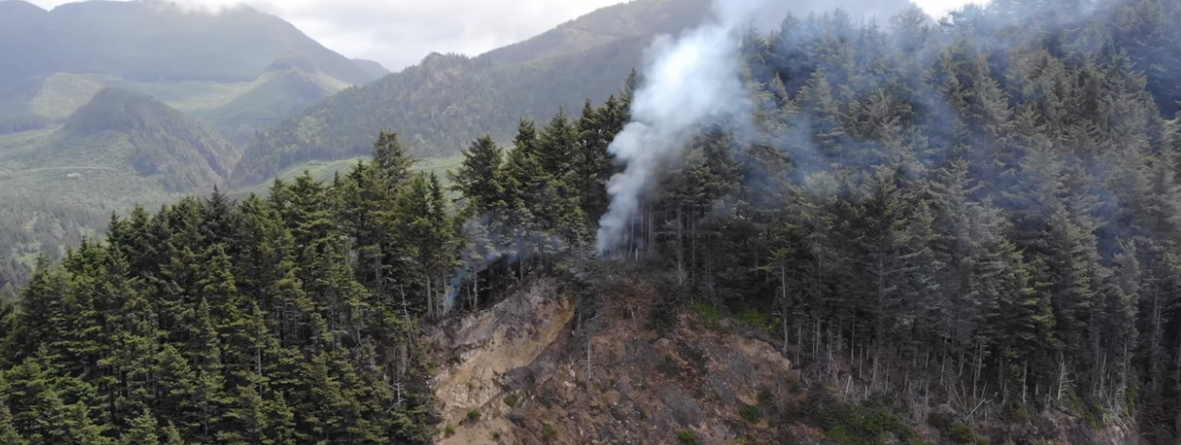

In [16]:
Image(filename ='D:/dataset_for_ml/fire and smoke/test_small/smoke13.png',width=256,height=256)

# Preprocessing the test image

In [17]:
def preprocessing(filename):
        img = tf.keras.utils.load_img(
                             filename,
                             target_size=(256, 256))

        img_array = tf.keras.utils.img_to_array(img)        
        img_array = tf.expand_dims(img_array, 0)
        predictions = cnn.predict(img_array)
        
        
        return predictions



In [18]:
class_indx=preprocessing(filename1)
    
if class_indx==0:
    print("The image contains fire")
    
else:
    print("the image contains smoke")


the image contains smoke


In [21]:
test_image2=image.load_img('D:/dataset_for_ml/fire and smoke/training/fire/15.png')

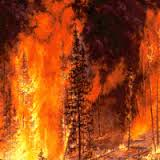

In [22]:
Image(filename='D:/dataset_for_ml/fire and smoke/training/fire/15.png',width=256,height=256)

In [23]:
image2=r"D:/dataset_for_ml/fire and smoke/training/fire/15.png"


class_indx=preprocessing(image2)
    
if class_indx==0:
    print("The image contains fire")
    
else:
    print("the image contains smoke")

The image contains fire
